Introduction/Business Problem:

With certain percentange of Canadian adults eating out at least once a week, the restaurant industry continues to thrive. While foodservice trends come and go, it’s certain that many Canadians will continue to enjoy meals prepared outside of the home. Starting a restaurant takes a lot of work, but with expert planning, you can start a successful restaurant business.

Opening a restaurant requires juggling many moving parts and can feel like a difficult undertaking. One of the major tasks is choose a Location that need to understand the competition of the area. Some nearby competition can help with marketing. But it’s wise to have enough of a distance that you can still guarantee a solid pool of customers who won’t be easily drawn to another similar place. So the problem is where we should open a Chinese restaurant in the Toronto city area ? 

In [ ]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import csv
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')

In [113]:
# Toronto Neighborhood location data from last couse assignment
df = pd.read_csv('toronto_result.csv')
print(df.shape)
df.head(10)

(103, 5)


,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [114]:
# The code was removed by Watson Studio for sharing.

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999",...,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,...,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,...,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,...,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,...,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,...,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [115]:
# Data preprocessing
df_income.rename(columns={"PostalCode": "Postalcode", "Borough":"Bor"},inplace=True)

In [116]:
df_income.head()

,Postalcode,Bor,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999",...,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,...,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,...,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,...,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,...,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,...,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [117]:
# Merge 2 tables
df = pd.merge(df,df_income,how='left',on='Postalcode')

In [118]:
df.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Bor,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,...,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,Scarborough,263.0,90290.0,6208.0,45.74,...,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Scarborough,134.0,12494.0,2403.0,5.20,...,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Scarborough,411.0,54764.0,8570.0,19.04,...,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,Woburn,43.770992,-79.216917,Scarborough,137.0,53485.0,4345.0,12.31,...,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,Scarborough,127.0,29960.0,4011.0,7.47,...,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [119]:
df.columns

Index(['Postalcode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude', 'Bor',
       'Neighbourhood Number', 'Population, 2016',
       'Population density per square kilometre',
       'Land area in square kilometres',
       'Total - Household total income groups in 2015 ', '  Under $5,000',
       '  $5,000 to $9,999', '  $10,000 to $14,999', '  $15,000 to $19,999',
       '  $20,000 to $24,999', '  $25,000 to $29,999', '  $30,000 to $34,999',
       '  $35,000 to $39,999', '  $40,000 to $44,999', '  $45,000 to $49,999',
       '  $50,000 to $59,999', '  $60,000 to $69,999', '  $70,000 to $79,999',
       '  $80,000 to $89,999', '  $90,000 to $99,999', '  $100,000 and over',
       '    $100,000 to $124,999', '    $125,000 to $149,999',
       '    $150,000 to $199,999', '    $200,000 and over', '    South Asian',
       '    Chinese', '    Black', '    Filipino', '    Latin American',
       '    Arab', '    Southeast Asian', '    West Asian', '    Korean',
       '    Japanese',

In [120]:
# Data preprocessing
df = df.drop(['Bor','Neighbourhood Number','Population density per square kilometre','Land area in square kilometres','  Under $5,000','  $5,000 to $9,999', '  $10,000 to $14,999', '  $15,000 to $19,999',
       '  $20,000 to $24,999', '  $25,000 to $29,999', '  $30,000 to $34,999',
       '  $35,000 to $39,999', '  $40,000 to $44,999', '  $45,000 to $49,999',
       '  $50,000 to $59,999', '  $60,000 to $69,999', '  $70,000 to $79,999',
       '  $80,000 to $89,999', '  $90,000 to $99,999', '  $100,000 and over',
       '    $100,000 to $124,999', '    $125,000 to $149,999',
       '    $150,000 to $199,999', '    $200,000 and over', '    South Asian',
       '    Chinese', '    Black', '    Filipino', '    Latin American',
       '    Arab', '    Southeast Asian', '    West Asian', '    Korean',
       '    Japanese', 'White'],axis=1)
df.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude,"Population, 2016",Total - Household total income groups in 2015
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,26825.0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,3700.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764.0,19855.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,18445.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960.0,10765.0


In [121]:
# Data preprocessing for NaN rows
df = df.dropna(axis=0,how='any')
print(df.columns)
print(df.shape)

Index(['Postalcode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude',
       'Population, 2016', 'Total - Household total income groups in 2015 '],
      dtype='object')
(88, 7)


In [122]:
# Data preprocessing
df.rename(columns={"Population, 2016": "Population", "Total - Household total income groups in 2015 ":"Household income"},inplace=True)

In [123]:
print(df.columns)
print(df.shape)

Index(['Postalcode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude',
       'Population', 'Household income'],
      dtype='object')
(88, 7)


In [124]:
# Toronto latitude and longitide
latitude  =  43.6529
longitude = -79.3849

In [125]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Neighborhood, Borough in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Borough']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [126]:
#Toronto neighborhood location data and household income data are used to generate 5 K-means Cluster. 

kclusters = 5

toronto_grouped_clustering = df.drop(['Postalcode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 2, 3, 3, 0, 4, 2, 3, 3, 4, 3, 0, 4, 0, 1, 4, 0, 4, 3, 4, 0, 1, 4,
       0, 0, 0, 4, 3, 0, 4, 2, 4, 0, 2, 4, 4, 4, 2, 3, 4, 0, 3, 2, 4, 2, 2,
       0, 1, 4, 2, 0, 2, 4, 2, 4, 0, 4, 0, 2, 4, 3, 4, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 2, 3, 4, 2, 3, 0, 1, 0, 2, 2, 4, 2, 0, 3], dtype=int32)

In [127]:
# add clustering labels
df.insert(0, 'Cluster Labels', kmeans.labels_)

In [128]:
df.head()

,Cluster Labels,Postalcode,Borough,Neighborhood,Latitude,Longitude,Population,Household income
0,1,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,26825.0
1,2,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,3700.0
2,3,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764.0,19855.0
3,3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,18445.0
4,0,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960.0,10765.0


In [129]:
# Re-create the map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [130]:
# Cluster0 result
df.loc[df['Cluster Labels'] == 0, df.columns[[3] + list(range(5, df.shape[1]))]]

,Neighborhood,Longitude,Population,Household income
4,Cedarbrae,-79.239476,29960.0,10765.0
11,"Maryvale, Wexford",-79.295849,27917.0,10105.0
13,"Clarks Corners, Sullivan, Tam O'Shanter",-79.304302,27446.0,10055.0
16,Upper Rouge,-79.205636,30491.0,9920.0
20,"Silver Hills, York Mills",-79.374714,27078.0,9665.0
24,Willowdale West,-79.442259,26274.0,10235.0
25,Parkwoods,-79.329656,34805.0,13305.0
26,Don Mills North,-79.352188,27695.0,12125.0
29,"Northwood Park, York University",-79.487262,27593.0,10165.0
35,"Woodbine Gardens, Parkview Hill",-79.309937,31216.0,12925.0


In [131]:
# Cluster1 result
df.loc[df['Cluster Labels'] == 1, df.columns[[3] + list(range(5, df.shape[1]))]]

,Neighborhood,Longitude,Population,Household income
0,"Rouge, Malvern",-79.194353,90290.0,26825.0
14,"Agincourt North, L'Amoreaux East, Milliken, St...",-79.284577,86468.0,28545.0
21,"Newtonbrook, Willowdale",-79.408493,90362.0,37370.0
54,"Harbourfront, Regent Park",-79.360636,76716.0,45710.0
83,"High Park, The Junction South",-79.464763,82712.0,37230.0
95,"Cloverdale, Islington, Martin Grove, Princess ...",-79.554724,105450.0,45490.0


In [132]:
# Cluster2 result
df.loc[df['Cluster Labels'] == 2, df.columns[[3] + list(range(5, df.shape[1]))]]

,Neighborhood,Longitude,Population,Household income
1,"Highland Creek, Rouge Hill, Port Union",-79.160497,12494.0,3700.0
6,"East Birchmount Park, Ionview, Kennedy Park",-79.262029,13641.0,5165.0
32,Downsview Central,-79.495697,11058.0,4180.0
36,Woodbine Heights,-79.318389,7865.0,3455.0
40,East Toronto,-79.338106,11499.0,5665.0
47,Davisville,-79.388790,11817.0,5680.0
49,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",-79.400049,12528.0,7015.0
50,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",-79.400049,10968.0,5405.0
56,St. James Town,-79.375418,15818.0,5520.0
59,"Adelaide, King, Richmond",-79.384568,7727.0,3125.0


In [133]:
# Cluster3 result
df.loc[df['Cluster Labels'] == 3, df.columns[[3] + list(range(5, df.shape[1]))]]

,Neighborhood,Longitude,Population,Household income
2,"Guildwood, Morningside, West Hill",-79.188711,54764.0,19855.0
3,Woburn,-79.216917,53485.0,18445.0
7,"Clairlea, Golden Mile, Oakridge",-79.284577,56512.0,20800.0
8,"Cliffcrest, Cliffside, Scarborough Village West",-79.239476,55834.0,20390.0
10,"Dorset Park, Scarborough Town Centre, Wexford ...",-79.273304,51575.0,16455.0
18,"Fairview, Henry Farm, Oriole",-79.346556,42774.0,16335.0
28,"Bathurst Manor, Downsview North, Wilson Heights",-79.442259,67397.0,25750.0
41,"The Danforth West, Riverdale",-79.352188,61173.0,26250.0
45,Davisville North,-79.390197,46433.0,24930.0
69,"CN Tower, Bathurst Quay, Island airport, Harbo...",-79.394420,48217.0,26130.0


In [134]:
# Cluster4 result
df.loc[df['Cluster Labels'] == 4, df.columns[[3] + list(range(5, df.shape[1]))]]

,Neighborhood,Longitude,Population,Household income
5,Scarborough Village,-79.239476,16724.0,5920.0
9,"Birch Cliff, Cliffside West",-79.264848,22291.0,9200.0
12,Agincourt,-79.262029,23757.0,8135.0
15,"L'Amoreaux West, Steeles West",-79.318389,24623.0,7820.0
17,Hillcrest Village,-79.363452,16934.0,6395.0
19,Bayview Village,-79.385975,21396.0,9530.0
22,Willowdale South,-79.408493,16936.0,7550.0
27,"Flemingdon Park, Don Mills South",-79.340923,21933.0,7830.0
30,"CFB Toronto, Downsview East",-79.464763,16164.0,6595.0
34,Victoria Village,-79.315572,17510.0,7410.0


In [135]:
# Calculate the average Household Income for each Cluster
means = df['Household income'].groupby([df['Cluster Labels']]).mean()

In [136]:
means=means.to_frame()
means.round(decimals=0)
print(type(means))
means.head()

<class 'pandas.core.frame.DataFrame'>


,Household income
Cluster Labels,
0,12185.833333
1,36861.666667
2,4737.500000
3,21598.461538
4,8227.608696


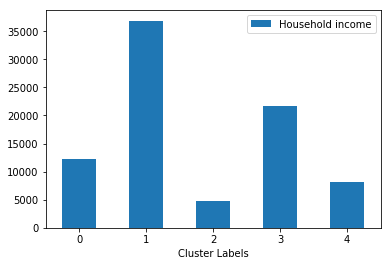

In [137]:
# Visualize the household income by cluster and very clear the Cluster 1 has the highest household income 
%matplotlib inline

ax = means.plot.bar(rot=0)

In [138]:
# Start prepare to get the four square data
CLIENT_ID = 'YGBHLNWF4GONIG1DKR30DVJG5QFCQRQBAUW2CAA4NEUI53QS' # your Foursquare ID
CLIENT_SECRET = '3P0WKZBUYLU2NQTAAO1NVLFCK5GQRO0SJGSYSI05TXFVSDXC' # your Foursquare Secret
VERSION = '20190314' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YGBHLNWF4GONIG1DKR30DVJG5QFCQRQBAUW2CAA4NEUI53QS
CLIENT_SECRET:3P0WKZBUYLU2NQTAAO1NVLFCK5GQRO0SJGSYSI05TXFVSDXC


In [139]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [140]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [141]:
LIMIT = 200
venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West, Steeles West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview Central
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, Riverdale
The Beaches West, India Baz

In [142]:
venues.groupby([venues['Neighborhood'], venues['Venue Category']],sort=True).count()

Neighborhood Latitude  \
Neighborhood             Venue Category                                     
Adelaide, King, Richmond American Restaurant                            2   
                         Aquarium                                       1   
                         Art Gallery                                    2   
                         Art Museum                                     1   
                         Arts & Crafts Store                            1   
                         Bakery                                         1   
                         Basketball Stadium                             1   
                         Beer Bar                                       2   
                         Bookstore                                      1   
                         Brazilian Restaurant                           1   
                         Breakfast Spot                                 1   
                         Brewery                                        1   
                         Burger Joint                                   1   
                         Burrito Place                                  2   
                         Café                                           5   
                         Clothing Store                                 1   
                         Coffee Shop                                    5   
                         Comedy Club                                    1   
                         Comic Shop                                     1   
                         Concert Hall                                   3   
                         Cosmetics Shop                                 2   
                         Creperie                                       1   
                         Food Truck                                     1   
                         French Restaurant                              1   
                         Gastropub                                      2   
                         Gym                                            2   
                         Gym / Fitness Center                           2   
                         Hotel                                          4   
                         Italian Restaurant                             1   
                         Japanese Restaurant                            3   
...                                                                   ...   
Woodbine Heights         Farmers Market                                 1   
                         Fast Food Restaurant                           3   
                         Fish & Chips Shop                              2   
                         French Restaurant                              1   
                         Fried Chicken Joint                            1   
                         Gastropub                                      4   
                         Gourmet Shop                                   1   
                         Grocery Store                                  1   
                         Gym / Fitness Center                           1   
                         Hungarian Restaurant                           1   
                         Ice Cream Shop                                 3   
                         Liquor Store                                   1   
                         Mexican Restaurant                             1   
                         Middle Eastern Restaurant                      2   
                         Park                                           6   
                         Pastry Shop                                    1   
                         Performing Arts Venue                          1   
                         Pharmacy                                       2   
                         Pizza Place                                    5   
                         Playground             

In [143]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 315 uniques categories.


In [144]:
# one hot encoding
toronto_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo Exhibit,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,...,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [145]:
toronto_grouped = toronto_onehot.groupby(venues['Neighborhood']).mean().reset_index()
toronto_grouped

,Neighborhood,Zoo Exhibit,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,...,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Adelaide, King, Richmond",0.000000,0.00,0.00,0.00,0.00,0.020000,0.00,0.000000,0.01,...,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000
1,Agincourt,0.000000,0.00,0.00,0.00,0.00,0.010000,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.00,0.010000,0.000000,0.000000,0.000000
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,...,0.030612,0.00,0.000000,0.0,0.00,0.00,0.010204,0.000000,0.000000,0.000000
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000
4,"Alderwood, Long Branch",0.000000,0.00,0.00,0.00,0.00,0.010000,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.00,0.020000,0.000000,0.000000,0.000000
5,"Bathurst Manor, Downsview North, Wilson Heights",0.000000,0.00,0.00,0.00,0.00,0.019231,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000
6,Bayview Village,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000
7,"Bedford Park, Lawrence Manor East",0.000000,0.00,0.00,0.00,0.00,0.010000,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.00,0.010000,0.000000,0.000000,0.000000
8,"Birch Cliff, Cliffside West",0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000
9,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0.000000,0.00,0.00,0.00,0.00,0.032258,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000


In [146]:
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                           venue  freq
0                           Café  0.05
1                    Coffee Shop  0.05
2                          Hotel  0.04
3                        Theater  0.04
4                   Concert Hall  0.03
5                    Pizza Place  0.03
6                Thai Restaurant  0.03
7            Japanese Restaurant  0.03
8  Vegetarian / Vegan Restaurant  0.03
9                       Beer Bar  0.02


----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.12
1           Coffee Shop  0.07
2              Pharmacy  0.05
3        Sandwich Place  0.03
4         Shopping Mall  0.03
5   Japanese Restaurant  0.03
6            Restaurant  0.03
7     Indian Restaurant  0.03
8  Cantonese Restaurant  0.03
9                  Bank  0.02


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                   venue  freq
0     Chinese Restaurant  0.17
1            Coffee Shop  0.07
2            Pizza Place  0.

In [147]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [148]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Café,Coffee Shop,Hotel,Theater,Pizza Place,Concert Hall,Vegetarian / Vegan Restaurant,Thai Restaurant,Japanese Restaurant,Cosmetics Shop
1,Agincourt,Chinese Restaurant,Coffee Shop,Pharmacy,Indian Restaurant,Shopping Mall,Sandwich Place,Cantonese Restaurant,Restaurant,Japanese Restaurant,Tea Room
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Chinese Restaurant,Coffee Shop,Pizza Place,Korean Restaurant,Bubble Tea Shop,Hong Kong Restaurant,Vietnamese Restaurant,Dessert Shop,Indian Restaurant,Japanese Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Coffee Shop,Fast Food Restaurant,Pizza Place,Indian Restaurant,Grocery Store,Park,Skating Rink,Sandwich Place,Chinese Restaurant,Discount Store
4,"Alderwood, Long Branch",Coffee Shop,Department Store,Fast Food Restaurant,Burger Joint,Pizza Place,Pharmacy,Seafood Restaurant,Café,Electronics Store,Breakfast Spot


In [149]:
# Combine four square data and Toronto cluster data for further analysis in order to determine the candidate neighborhoods to open the Chinese restaurant
df_final = pd.merge(df,neighborhoods_venues_sorted,how='left',on='Neighborhood')

In [150]:
# We believe Cluster 1 has the highest income implies the highest spending for eating outside, so we should consider to open a new Chinese restaurent in this area
df_final.loc[df_final['Cluster Labels'] == 1, df_final.columns[[3] + list(range(5, df_final.shape[1]))]]

,Neighborhood,Longitude,Population,Household income,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Rouge, Malvern",-79.194353,90290.0,26825.0,Zoo Exhibit,Fast Food Restaurant,Pizza Place,Athletics & Sports,Park,Zoo,Mediterranean Restaurant,Liquor Store,Fried Chicken Joint,Café
14,"Agincourt North, L'Amoreaux East, Milliken, St...",-79.284577,86468.0,28545.0,Chinese Restaurant,Coffee Shop,Pizza Place,Korean Restaurant,Bubble Tea Shop,Hong Kong Restaurant,Vietnamese Restaurant,Dessert Shop,Indian Restaurant,Japanese Restaurant
21,"Newtonbrook, Willowdale",-79.408493,90362.0,37370.0,Korean Restaurant,Coffee Shop,Bank,Café,Japanese Restaurant,Bubble Tea Shop,Middle Eastern Restaurant,Fast Food Restaurant,Dessert Shop,Ramen Restaurant
47,"Harbourfront, Regent Park",-79.360636,76716.0,45710.0,Coffee Shop,Café,Park,Restaurant,Italian Restaurant,Thai Restaurant,Farmers Market,Bar,Gastropub,Pub
71,"High Park, The Junction South",-79.464763,82712.0,37230.0,Café,Coffee Shop,Italian Restaurant,Bakery,Bar,Pizza Place,Gastropub,Brewery,Park,Restaurant
80,"Cloverdale, Islington, Martin Grove, Princess ...",-79.554724,105450.0,45490.0,Convenience Store,Coffee Shop,Pizza Place,Park,Bank,Grocery Store,Gym / Fitness Center,Sandwich Place,Pharmacy,Sushi Restaurant
